# constructing 2D/3D local box using GeoPoints.jl 

Nobuaki Fuji (IPGP/UPC/IUF) December 2025

In [1]:
using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv"


include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

using .planet1D, .GeoPoints

  Activating project at `~/Documents/Github/flexOPT`


  1.909251 seconds (4.58 M allocations: 209.572 MiB, 1.31% gc time, 99.93% compilation time)


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 100.0 # in metre
Δz = 100.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [4]:
@show p1 # GeoPoint has some attributes

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [5]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)


(GeoPoint[GeoPoint(48.907887632772656, 2.359796896592829, -99838.236349905, [4.1310335068414416e6, 170237.94705026117, 4.708588583009119e6], 6.266197031478216e6) GeoPoint(48.90783553005014, 2.3597891713586034, -99738.40068796469, [4.1311033881302495e6, 170240.2688795216, 4.708660075768077e6], 6.266296885857039e6) … GeoPoint(48.84658480113155, 2.350718261091315, 19868.412401470814, [4.21482117212187e6, 173021.8203335292, 4.794308401000045e6], 6.3859257047962835e6) GeoPoint(48.8465346306368, 2.350710839849349, 19968.254166095423, [4.214891053410677e6, 173024.14216278965, 4.794379893759004e6], 6.3860255645881295e6); GeoPoint(48.90698048711516, 2.3596539064577184, -99843.96616668951, [4.1311049434455377e6, 170230.5636253266, 4.708518996396675e6], 6.26619163750844e6) GeoPoint(48.90692839876675, 2.359646183774253, -99744.1304135474, [4.131174824734345e6, 170232.88545458706, 4.708590489155632e6], 6.266291491973217e6) … GeoPoint(48.845694570202916, 2.350578265495784, 19862.789894269616, [4.214

In [6]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [1900.0, -97100.0], [0.9985613843374025, 0.05362053440772882], [-0.05362053440772882, 0.9985613843374025])

In [7]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,effectiveRadii,2.0)

(ρ = [3.3725411830199197 3.3725520415888193 … 0.0 0.0; 3.372540560394905 3.372551418973144 … 0.0 0.0; … ; 3.372294819306954 3.372305677881151 … 0.0 0.0; 3.3722953694174183 3.3723062279822686 … 0.0 0.0], Vpv = [7.936501067356701 7.936614263703209 … 0.0 0.0; 7.936494576733715 7.9366077731775775 … 0.0 0.0; … ; 7.933932821718081 7.934046018119805 … 0.0 0.0; 7.933938556405154 7.934051752709441 … 0.0 0.0], Vph = [8.135589067359291 8.135661476637637 … 0.0 0.0; 8.135584915446788 8.13565732478741 … 0.0 0.0; … ; 8.133946215632685 8.134018624946352 … 0.0 0.0; 8.133949883989176 8.134022293240514 … 0.0 0.0], Vsv = [4.413419311905491 4.413396293119483 … 0.0 0.0; 4.41342063179139 4.413397612985585 … 0.0 0.0; … ; 4.413941571665586 4.41391855286835 … 0.0 0.0; 4.413940405501318 4.413917386723897 … 0.0 0.0], Vsh = [4.544031640720238 4.54412130703096 … 0.0 0.0; 4.544026499297962 4.544116165685802 … 0.0 0.0; … ; 4.541997254288626 4.5420869206430865 … 0.0 0.0; 4.542001796910794 4.542091463188072 … 0.0 0.0],

In [8]:
Nx,Nz=size(allGridsInCartesian)

(6761, 1201)

In [9]:
maximum(seismicModel.ρ)

3.3807231008674763

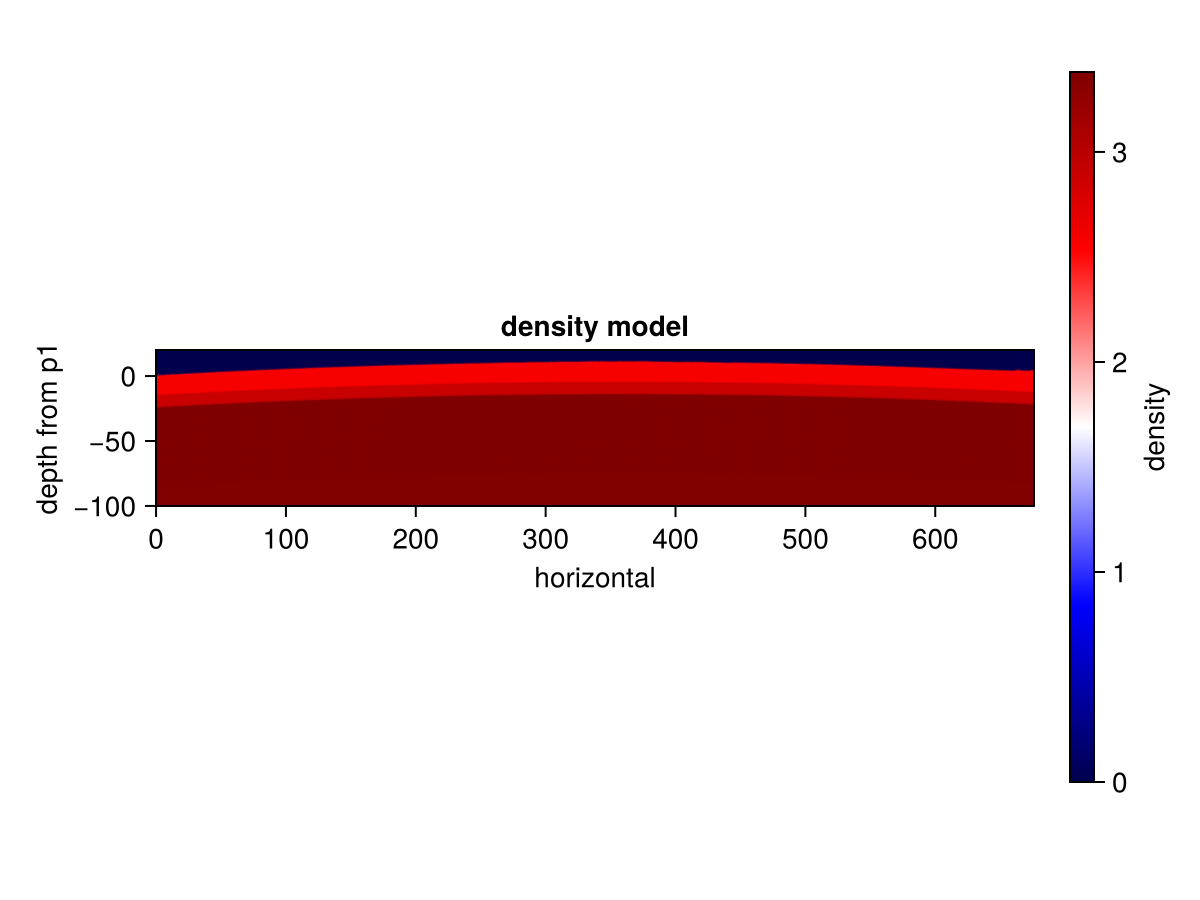

In [10]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    colormap = :seismic,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# 3D box ? yes

In [17]:
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 100.0 # in metre
Δy = 100.0
Δz = 100.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

horizontalDepth = 50.e3

50000.0

In [ ]:

allGridsInGeoPoints3D, allGridsInCartesian3D, effectiveRadii3D=constructLocalBox(p1,p2,Δx,Δy,Δz,-horizontalDepth,horizontalDepth,altMin,altMax)

#ok 3D box version needs to be GPUed

In [ ]:
using GLMakie

f = Figure()
Axis3(f[1, 1])
scatter!(rand(10), rand(10), rand(10))
f


# another way of importing model parameters

In [ ]:
include("../src/imageReader.jl")
using .imageReader

here, i try to use some of heritages from demo1.ipynb (flex in myOwnApplications in the old version)

# now construction of OPT operators

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [ ]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

In [ ]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



In [ ]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

In [ ]:
Nx,Ny,Nz=size(allGridsInCartesian)

In [ ]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

In [ ]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig